# RFM Analysis of CRM System Data

Dataset 
https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities/data?select=sales_pipeline.csv

## Objectives and insights

CRM system helps comapny to manage interaction with customers. RFM analysis can effectively analysis times series sales data and ranked customers based on recencies, frequencies and monetary values of their transactions.

The predicted model ultimately calculated customers' life time value(CLTV). The level of CLTV divides customers into 5 segments.
Higher CLTV indicates loyality, profitable and active customers. The company can provide exclusive offers to retain these customers. Meanwhile, the company may need to reassess their relationsip with customers with low CLTV.

Recency, frequency and monetary values weight equally in the model. Adjustment on weight are subject to the nature and goals of business. For example, to detect fraud, the model should put weights on low frequency and high monetary values transactions. 

In [1006]:
import pandas as pd

In [1007]:
sales_data=pd.read_csv('sales_pipeline.csv')
sales_data

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


In [1008]:
sales_data.isna().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [1010]:
close_won_data=sales_data[sales_data['deal_stage']=='Won'] # close won deals only 
close_won_data

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8295,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0
8296,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0
8297,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,2017-12-26,2017-12-29,4433.0
8298,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0


In [1178]:
close_won_data.isna().sum()

opportunity_id    0
sales_agent       0
product           0
account           0
deal_stage        0
engage_date       0
close_date        0
close_value       0
dtype: int64

In [1182]:
close_won_data['opportunity_id'].duplicated().sum() 

0

In [1012]:
# calculate RFM
close_won_data.loc[:,'close_date']=pd.to_datetime(close_won_data['close_date'])
reference_date=pd.to_datetime('2018-01-01')
rfm_data=close_won_data.groupby('account').agg({'close_date': [lambda x: (x.max()-x.min()).days,
                                                               lambda x: (reference_date-x.min()).days],
                                                'opportunity_id':'count',
                                                'close_value':'sum',
                                               })

In [1013]:
rfm_data.columns = rfm_data.columns.droplevel(0)

In [1014]:
rfm_data=rfm_data.rename(columns={'<lambda_0>':'recency',
                                  '<lambda_1>':'tenure', 
                                  'count':'frequency',
                                  'sum':'monetary'})

In [1015]:
rfm_data.describe()

,recency,tenure,frequency,monetary
count,85.000000,85.000000,85.000000,85.000000
mean,295.552941,300.682353,49.858824,117712.164706
std,9.731522,8.663294,18.538347,46525.656119
min,238.000000,240.000000,23.000000,51632.000000
25%,291.000000,299.000000,36.000000,85047.000000
50%,298.000000,304.000000,47.000000,111533.000000
75%,302.000000,305.000000,57.000000,140086.000000
max,305.000000,306.000000,115.000000,341455.000000


In [ ]:
! pip install lifetimes
from lifetimes import BetaGeoFitter

In [1017]:
# Predict expected number of purchases of next quarter using BG/NBD model
bgf=BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(rfm_data['frequency'],rfm_data['recency'],rfm_data['tenure'])

<lifetimes.BetaGeoFitter: fitted with 85 subjects, a: 0.00, alpha: 23.16, b: 0.00, r: 3.84>

In [1018]:
rfm_data['predicted_purchase']=bgf.conditional_expected_number_of_purchases_up_to_time(91,rfm_data['frequency'],rfm_data['recency'],rfm_data['tenure'])
rfm_data['predicted_purchase'].sort_values(ascending=False)

account
Kan-code                 33.155697
Konex                    32.088104
Hottechi                 31.844415
Condax                   30.272846
Rangreen                 21.995553
                           ...    
Donware                   9.557605
Opentech                  9.354351
The New York Inquirer     8.964842
Iselectrics               8.599026
Sumace                    7.441734
Name: predicted_purchase, Length: 85, dtype: float64

In [1019]:
rfm_data["monetary"]=rfm_data["monetary"]/rfm_data["frequency"]

In [1020]:
from lifetimes import GammaGammaFitter

In [1021]:
# Predict average profit using Gamma-Gamma Model
ggf=GammaGammaFitter(0.01)
ggf.fit(rfm_data["frequency"],rfm_data["monetary"])

<lifetimes.GammaGammaFitter: fitted with 85 subjects, p: 3.06, q: 0.19, v: 3.06>

In [1022]:
rfm_data['predicted_avg_profit']=ggf.conditional_expected_average_profit(rfm_data["frequency"],rfm_data["monetary"])

In [1023]:
# Calcuate customer's life time value
rfm_data['quarter_cltv']=ggf.customer_lifetime_value(bgf, rfm_data['frequency'],rfm_data['recency'],rfm_data['tenure'],rfm_data["monetary"], 
                                                     time=3,discount_rate=0.01)
rfm_data

,recency,tenure,frequency,monetary,predicted_purchase,predicted_avg_profit,quarter_cltv
account,,,,,,,
Acme Corporation,301,306,34,2992.470588,10.460194,3015.970637,30587.187810
Betasoloin,302,306,34,2854.000000,10.460194,2876.416828,29171.869464
Betatech,296,299,53,2026.566038,16.054363,2036.765671,31703.474258
Bioholding,293,297,50,1819.820000,15.301956,1829.537825,27143.199695
Bioplex,287,303,31,2173.967742,9.719395,2192.733611,20663.211375
...,...,...,...,...,...,...,...
Zencorporation,281,295,33,2626.969697,10.535823,2648.241045,27051.956144
Zoomit,294,298,33,2323.757576,10.437406,2342.584513,23706.124859
Zotware,290,292,47,2943.382979,14.678495,2960.069122,42126.569780


In [1136]:
# Customer segmentation
rank_data=rfm_data.assign(segment=pd.qcut(rfm_data['quarter_cltv'],q=5, labels=range(1,6)))

In [1138]:
rank_data.sort_values(by=['segment'],ascending=False)

,recency,tenure,frequency,monetary,predicted_purchase,predicted_avg_profit,quarter_cltv,segment
account,,,,,,,,
Konex,293,294,108,2493.009259,32.088104,2499.144505,77751.383104,5
Hottechi,304,305,111,1756.369369,31.844415,1760.582824,54357.870415,5
Singletechno,303,305,72,2268.597222,21.029590,2276.985789,46426.274584,5
Kan-code,302,303,115,2969.173913,33.155697,2976.030096,95668.328922,5
Scotfind,292,301,67,2428.731343,19.885461,2438.381652,47012.143650,5
...,...,...,...,...,...,...,...,...
The New York Inquirer,291,300,28,2737.000000,8.964842,2763.152884,24017.083814,1
Opentech,301,306,30,2622.300000,9.354351,2645.675917,23995.124653,1
Statholdings,302,303,34,1972.941176,10.556406,1988.465699,20351.990521,1


In [1140]:
rank_data['segment']=rank_data['segment'].replace({1:'unprofitable',2:'barely profitable', 3:'profitable', 4:'highly profitable', 5:'most profitable'})

<BarContainer object of 5 artists>

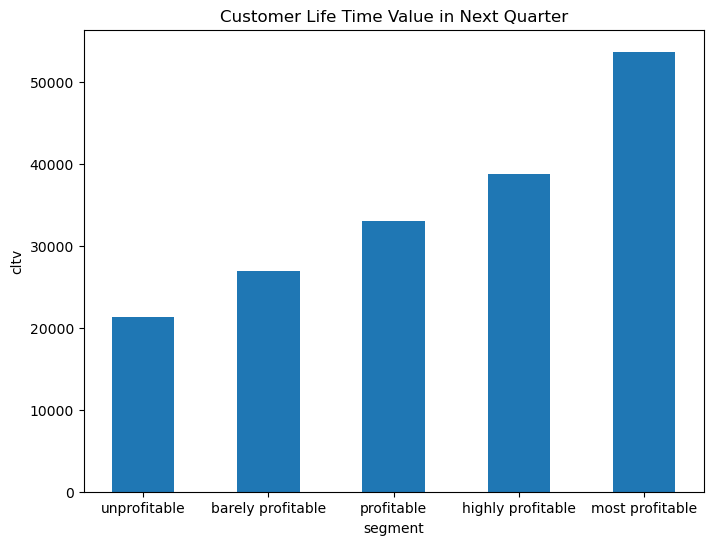

In [1168]:
# Visualize cltv of different customer segments
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Customer Life Time Value in Next Quarter')
plt.ylabel('cltv')
plt.xlabel('segment')

cltv_group=rank_data.groupby('segment').mean()['quarter_cltv']
segment_group=rank_data.groupby('segment').mean().index
plt.bar(segment_group,cltv_group, width=0.5)